# Dynamic Network Classes

## Table of Contents

1. [Creating a simple graph](#creating)
  *   [Using a snapshot representation](#sn)
  *  [Using an interval graph representation](#ig) 
2. [Visualization](#vizu)
3. [Conversion between snapshots and interval graphs](#conversion)
4. [Aggregation/Slicing](#aggregation)
  *   [Slicing](#aggregation)
  *   [Cumulated graphs](#aggregation)
  *   [Resampling](#aggregation)



If tnerwork library is not installed, you need to install it, for instance using the following command

In [1]:
#%%capture #avoid printing output
#!pip install --upgrade git+https://github.com/Yquetzal/tnetwork.git

In [1]:
import tnetwork as tn

<a id='creating'></a>
## Creating simple dynamic graphs and accessing their properties
We will represent a graph with similar properties using snapshots and interval graphs
<a id='sn'></a>




### Using a snapshot representation
`DynGraphSN` is the class used to represent dynamic networks with snapshots (SN). By default, **each snapshot last until the next**. The last snapshot has a duration equal to the min of all the snapshots. 


In [2]:
dg_sn = tn.DynGraphSN()
dg_sn
dg_sn.add_node_presence("a",1) #add node a in snapshot 1
dg_sn.add_nodes_presence_from(["a","b","c"],2) #add nodes a,b,c in snapshot 2
dg_sn.add_nodes_presence_from("d",[2,5]) #add node in snapshots 2 & 5

dg_sn.add_interaction("a","b",2) #link a and b in snapshot 2
dg_sn.add_interactions_from(("b","d"),[2,3,4]) #link b and d in snapshots 2, 3 and 4

<a id='ig'></a>

### Using an interval graph representation.
`DynGraphIG` is the class used to represent dynamic networks with Interval Graphs (IG)


Note the similarity between the functions used.

Both graphs are very similar if we consider that the snapshots of `dg_sn` have a duration of 1.

In [26]:
dg_ig = tn.DynGraphIG()

dg_ig.add_node_presence("a",(1,2)) #add node a from time 1 to 2
dg_ig.add_nodes_presence_from(["a","b","c"],(2,3)) # add ndoes a,b,c from 2 to 3
dg_ig.add_nodes_presence_from("d",(2,6)) #add node from 2 to 6

dg_ig.add_interaction("a","b",(2,3)) # link nodes a and b from 2 to 3 
dg_ig.add_interactions_from(("b","d"),(2,5)) # link nodes b and d from 2 to 5

### Accessing functions
Using accessing functions, we can check that both graphs are very similar
(Note that intervals are coded using the tnetwork.Intervals class, and are printed as \[start,end\[. Therefore, 2 snapshots of duration 1 at times 1 and 2 code a situation similar to an interval \[1,3[

In [4]:
print(dg_sn.graph_at_time(2).edges)
print(dg_ig.graph_at_time(2).edges)
print(dg_sn.graph_at_time(3).edges)
print(dg_ig.graph_at_time(3).edges)

[('a', 'b'), ('b', 'd')]
[('a', 'b'), ('b', 'd')]
[('b', 'd')]
[('b', 'd')]


In [5]:
print(dg_sn.node_presence())
print(dg_ig.node_presence())

{'a': [1, 2], 'b': [2, 3, 4], 'c': [2], 'd': [2, 3, 4, 5]}
{'a': [1,3[ , 'b': [2,5[ , 'c': [2,3[ , 'd': [2,6[ }


<a id='vizu'></a>

## Visualization
We can use a basic visualization to compare nodes presence of both representation. 

See the notebook on visualization to see more possibilities.

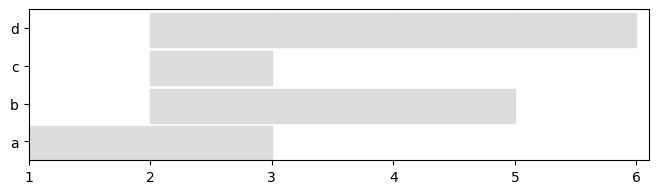

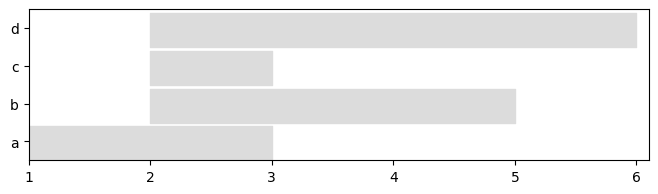

In [27]:
plot = tn.plot_longitudinal(dg_sn,height=200)
plot = tn.plot_longitudinal(dg_ig,height=200)

It is also possible to plot the graph at any given time.

ColumnDataSource(id='1016', ...)
ColumnDataSource(id='1017', ...)


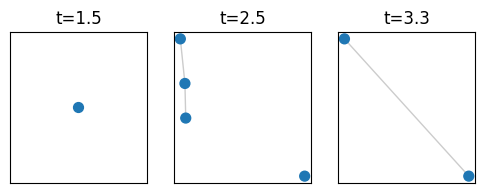

In [28]:
plot = tn.plot_as_graph(dg_sn,ts=2,auto_show=True,width=300,height=300)
plot = tn.plot_as_graph(dg_ig,ts=[1.5,2.5,3.3],auto_show=True,width=200,height=200)

<a id='conversion'></a>

## Conversion between snapshots and interval graphs
We convert the snapshot representation into an interval graph representation, using a snapshot lenght of 1. 

We check that both graphs are now similar

In [8]:
converted_to_IG = dg_sn.to_DynGraphIG(sn_duration=1)
print(converted_to_IG.node_presence())
print(dg_ig.node_presence())

{'a': [1,3[ , 'b': [2,5[ , 'c': [2,3[ , 'd': [2,6[ }
{'a': [1,3[ , 'b': [2,5[ , 'c': [2,3[ , 'd': [2,6[ }


Reciprocally, we transform the interval graph into a snapshot representation and check the similarity

In [9]:
converted_to_SN = dg_ig.to_DynGraphSN(slices=1)
print(converted_to_SN.node_presence())
print(dg_sn.node_presence())

{'a': [1, 2], 'b': [2, 3, 4], 'c': [2], 'd': [2, 3, 4, 5]}
{'a': [1, 2], 'b': [2, 3, 4], 'c': [2], 'd': [2, 3, 4, 5]}


<a id='aggregation'></a>

## Aggregation/Slicing



<a id='Slicing'></a>

### Slicing
One can conserve only a chosen period using the slice function

[2,3[ 
[2,5[ 


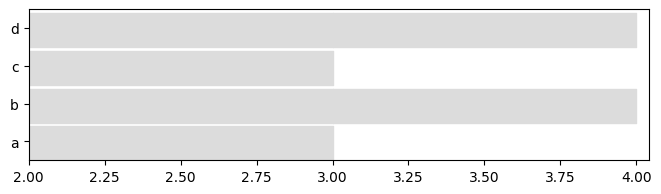

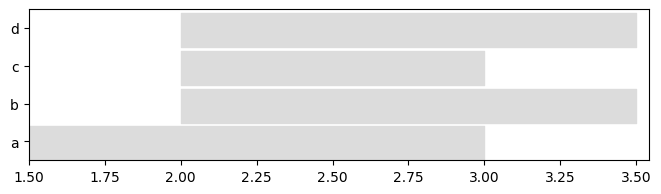

In [11]:
sliced_SN = dg_sn.slice(2,4) #Keep only the snapshots from 2 to 4
sliced_IG = dg_ig.slice(1.5,3.5) #keep only what happens between 1.5 and 3.5 in the interval graph

plot = tn.plot_longitudinal(sliced_SN,height=200)
plot = tn.plot_longitudinal(sliced_IG,height=200)

### Creating cumulated graphs
It can be useful to create cumulated weighted graphs to summarize the presence of nodes and edges over a period

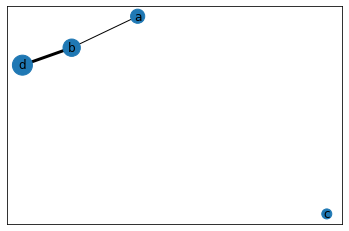

In [12]:
import networkx as nx
%matplotlib inline
g_cumulated = dg_sn.cumulated_graph()

#Similarly for interval graphs: 
#g_cumulated = dg_ig.cumulated_graph()

#Draw with node size and edge width propotional to weights in the cumulated graph
nx.draw_networkx(g_cumulated,node_size=[g_cumulated.nodes[n]['weight']*100 for n in g_cumulated.nodes], width = [g_cumulated[u][v]['weight'] for u,v in g_cumulated.edges])

Graphs can also be cumulated only over a specific period

In [13]:
g_cumulated = dg_sn.cumulated_graph([1,2]) # create a static graph cumulating snapshots 
g_cumulated = dg_ig.cumulated_graph((1,3))

### Resampling
Sometimes, it is useful to study dynamic network with a lesser temporal granularity than the original data.

Several functions can be used to aggregate dynamic graphs, thus yielding snapshots covering larger periods.

Do exemplify this usage, we use a dataset from the sociopatterns project (http://www.sociopatterns.org) that can be loaded in a single command

In [14]:
sociopatterns = tn.DynGraphSN.graph_socioPatterns2012()

For this original network loaded as a snapshot representation, we print the number of snapshots and the first and last dates (the dataset covers 9 days, including a week-end with no activity)

In [15]:
from datetime import datetime
all_times = sociopatterns.snapshots_timesteps()
print("# snapshots:",len(all_times))
print("first date:",datetime.utcfromtimestamp(all_times[0])," laste date:",datetime.utcfromtimestamp(all_times[-1]))

# snapshots: 11273
first date: 2012-11-19 05:36:20  laste date: 2012-11-27 16:14:40


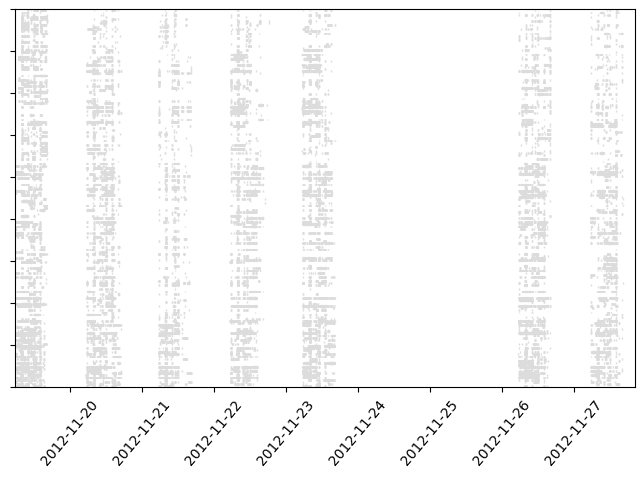

In [18]:
#Be careful, the plot takes a few seconds to draw. 
to_plot_SN = tn.plot_longitudinal(sociopatterns,height=500,sn_duration=20,to_datetime=True)

We then aggregate on fixed time periods using the `aggregate_time_period` function. Although there are several ways to call this function, the simplest one is using a string such as "day", "hour", "month", etc.
Note how the beginning of the first snapshot is now on midnight of the day on which the first observation was made

In [19]:
sociopatterns_Day = sociopatterns.aggregate_time_period("day")

In [20]:

all_times = sociopatterns_Day.snapshots_timesteps()
print("# snapshots:",len(all_times))
print("first date:",datetime.utcfromtimestamp(all_times[0])," laste date:",datetime.utcfromtimestamp(all_times[-1]))

# snapshots: 7
first date: 2012-11-19 00:00:00  laste date: 2012-11-27 00:00:00


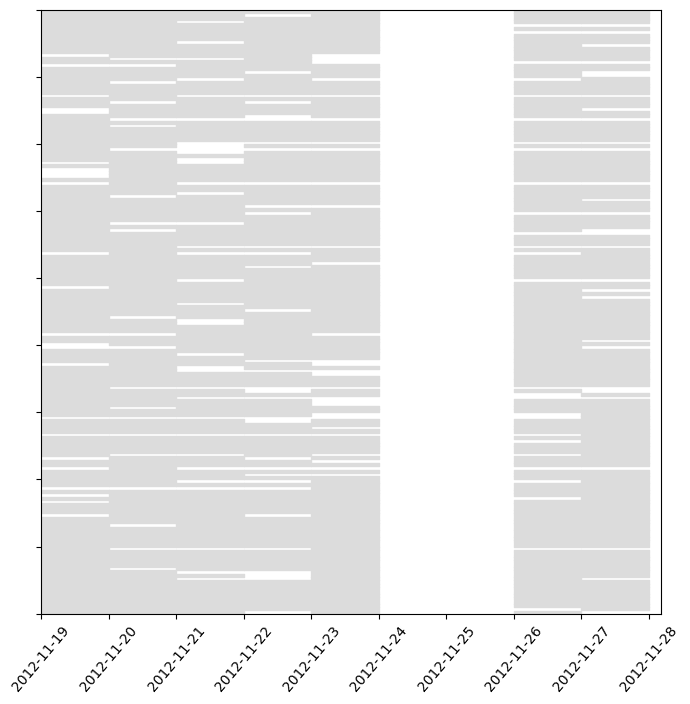

In [21]:
to_plot_SN = tn.plot_longitudinal(sociopatterns_Day,height=800,to_datetime=True,sn_duration=24*60*60)

Another way to aggregate is to use sliding windows. In this example, we use non-overlapping windows of one hour, but it is possible to have other parameters, such as overlapping windows.
Note how, this time, the first snapshot starts exactly at the time of the first observation in the original data

In [22]:
sociopatterns_hour_window = sociopatterns.aggregate_sliding_window(bin_size=60*60)

In [23]:
all_times = sociopatterns_hour_window.snapshots_timesteps()
print("# snapshots:",len(all_times))
print("first date:",datetime.utcfromtimestamp(all_times[0])," laste date:",datetime.utcfromtimestamp(all_times[-1]))

# snapshots: 203
first date: 2012-11-19 05:36:20  laste date: 2012-11-27 15:36:20


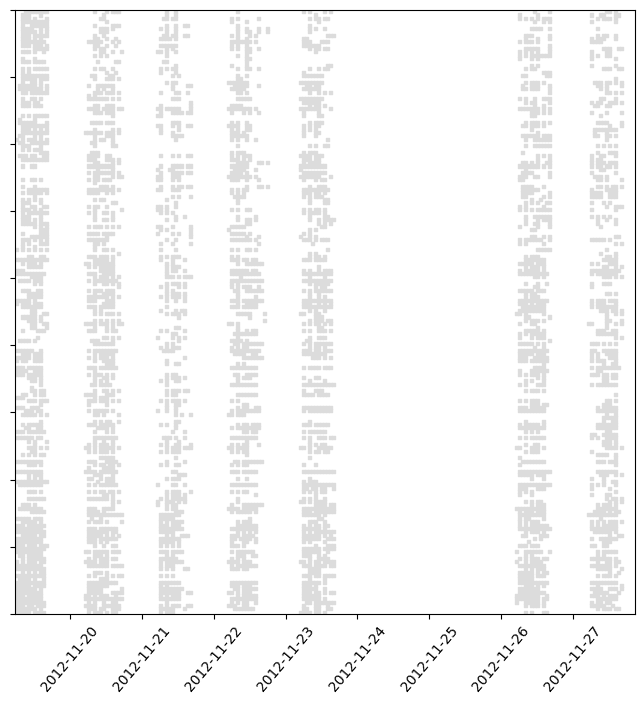

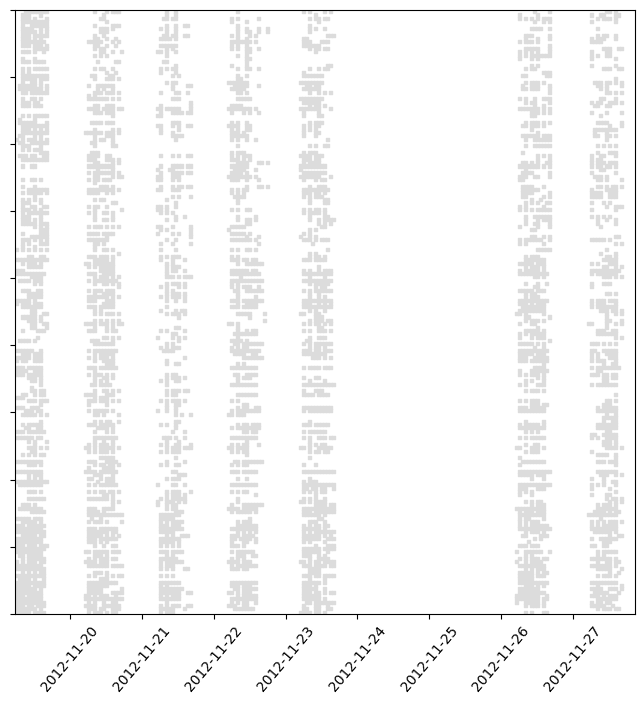

In [24]:
plot =tn.plot_longitudinal(sociopatterns_hour_window,height=800,to_datetime=True,sn_duration=60*60)